# SALES PREDICTION USING PYTHON

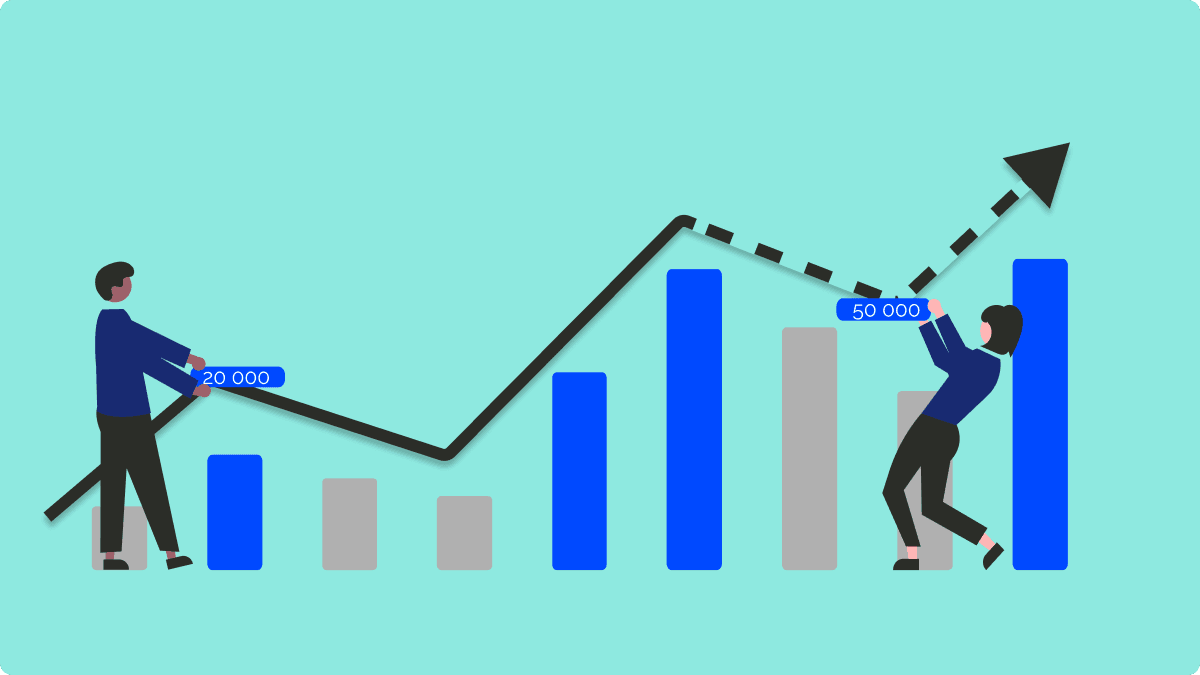

## **ABOUT THE AUTHOR**

Hi there! I'm Akshay Shekade, a data scientist in training. I'm diving into the world of data science and exploring various concepts and techniques to enhance my skills. Join me on this exciting journey as we learn and grow in the field of data science together. 

> "Community is the heart of growth and learning. Together, we can achieve more than we ever could alone."

| Name               | Email                                               | LinkedIn                                                  | GitHub                                           | Kaggle                                      |
|--------------------|-----------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------|-----------------------------------------------|
| **Akshay Shekade**      |akshayshekade757@gmail.com  | [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-%23000000.svg?style=for-the-badge&logo=LinkedIn&logoColor=white)](https://www.linkedin.com/in/akshay-shekade-a225a8135/)  | [![GitHub Badge](https://img.shields.io/badge/GitHub-%23000000.svg?style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/AkshayShekade)  | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-%23000000.svg?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/akshayshekade)  |

> **LETS BEGIN** :)

### OBJECTIVE

- Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
- Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product.
- So let’s start the task of sales prediction with machine learning using Python.

**IMPORTING ALL THE NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**IMPORTING A DATASET**

In [2]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**DROPPING UNWANTED COLUMNS**

In [3]:
df.drop(columns='Unnamed: 0', inplace = True)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**INFORMATION ABOUT A DATASET**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**DESCRIPTION OF A DATASET**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


**CHECKING MISSING VALUES**

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**CHECKING DUPLICATE VALUES**

In [8]:
df.duplicated().sum()

0

### DATA PRE-PROCESSING

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**SPLIT FEATURES AND TARGET VARABLE**

In [10]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

**SPLIT THE DATA INTO TRAINING AND TESTING SETS**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**SCALE THE FEATURE**

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### EXPLORATORY DATA ANALYSIS

**OUTLIER DETECTION**

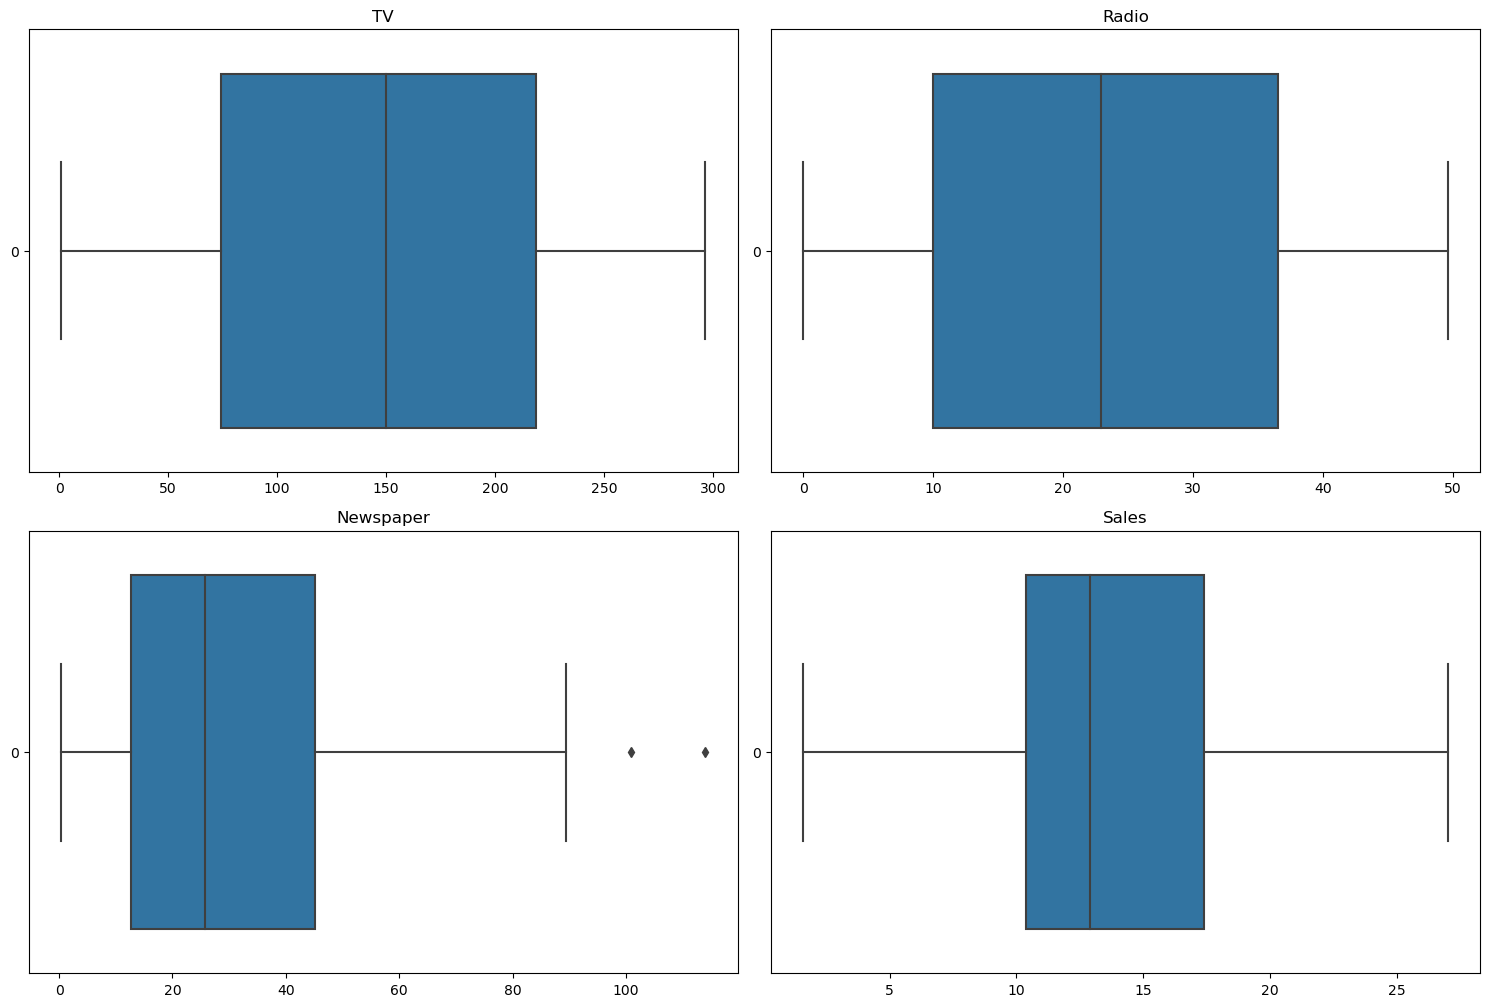

In [13]:
plt.figure(figsize=(15, 30))

x = 1
for col in df.describe().columns:
    plt.subplot(6, 2, x)
    sns.boxplot(df[col], orient = 'horizontal')
    plt.title(col)
    x += 1

plt.tight_layout()
plt.show()

**OUTLIER DETECTION USING IQR METHOD**

In [14]:
def iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = []

    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    print(f'Outliers using IQR method: {outliers}')

In [15]:
iqr(df['Newspaper'])

Outliers using IQR method: [114.0, 100.9]


**PAIRPLOT TO VISUALIZE RELATIONSHIPS**

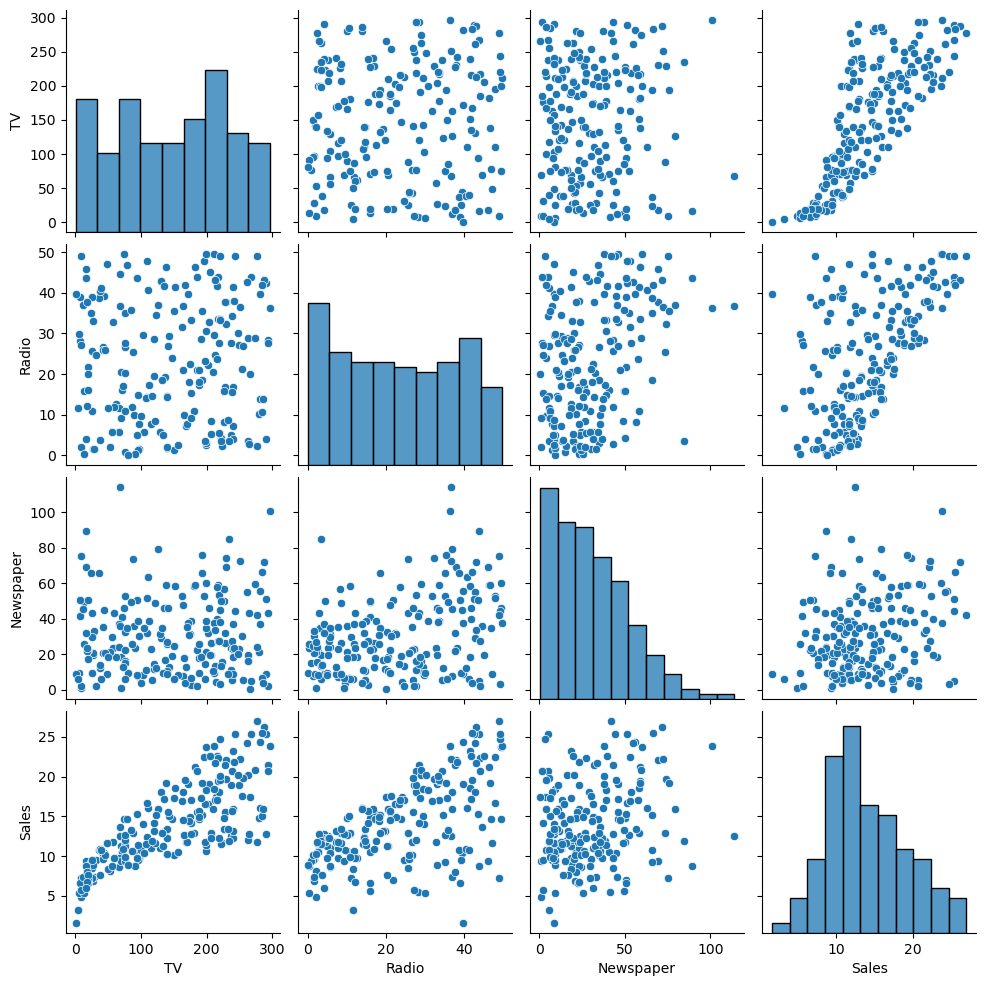

In [16]:
sns.pairplot(df)
plt.show()

**CORRELATION MATRIX**

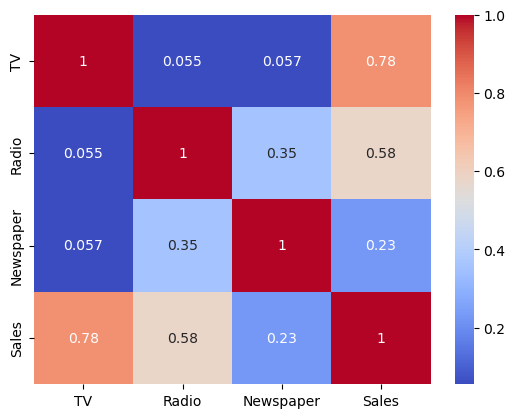

In [17]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### MODEL TRAINING

**LINEAR REGRESSION**

**TRAIN LINEAR REGRESSION MODEL**

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

**MAKE PREDICTIONS**

In [19]:
y_pred_linear = linear_model.predict(X_test)

**EVALUATE THE MODEL**

In [20]:
mse_inear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MSE : {mse_inear}')
print(f'Linear Regression R^2 : {r2_linear}')

Linear Regression MSE : 3.174097353976104
Linear Regression R^2 : 0.899438024100912


**RANDOM FOREST REGRESSOR**

**TRAIN A RANDOM FOREST REGRESSOR**

In [21]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**MAKE PREDICTIONS**

In [22]:
y_pred_rf = rf_model.predict(X_test)

**EVALUATE THE MODEL**

In [23]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R^2: {r2_rf}')

Random Forest MSE: 0.5910253749999989
Random Forest R^2: 0.9812750924472915


### MODEL EVALUATION

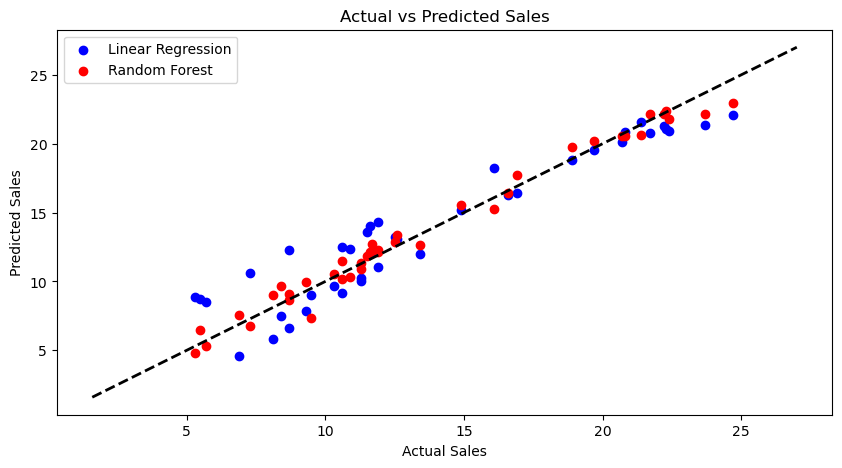

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()

### PREDICTION

**EXAMPLE NEW DATA**

In [25]:
new_data = pd.DataFrame({
    'TV': [300], 
    'Radio': [150], 
    'Newspaper': [50]
})

**SCALE THE NEW DATA**

In [26]:
new_data_scaled = scaler.transform(new_data)

**PREDICT SALES**

In [27]:
sales_prediction = rf_model.predict(new_data_scaled)
print(f'Predicted Sales: {sales_prediction[0]}')

Predicted Sales: 26.058000000000025


- **Thank you so much for taking the time to explore this notebook with me. Your support means the world to me, and I couldn't have come this far without it. As I continue my journey in data science and machine learning, I humbly ask for your continued support and encouragement. Together, we can make a difference in the world of data science and beyond. 🚀💫**